<a href="https://colab.research.google.com/github/Zalatoelka/wincademy/blob/main/AssignmentM5_Shark_Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


%load_ext google.colab.data_table


In [2]:
shark_attacks=pd.read_csv("https://raw.githubusercontent.com/Zalatoelka/wincademy/main/attacks.csv", encoding='ISO-8859-1')
display (shark_attacks)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Rename columns
shark_attacks.rename(columns={'Fatal (Y/N)': 'Fatal', 'Species ': 'Species'}, inplace=True)

# Drop irrelevant columns/Keep relevant columns
shark_attacks = shark_attacks.loc[:, ['Type', 'Activity', 'Name', 'Age', 'Injury', 'Fatal', 'Species']]

# Drop 'empty' rows
shark_attacks.dropna(how="all", inplace=True)

# Drop rows that are invalid or questionable
# Aanname 1: invalid zijn geen werkelijke haai aanvallen
# Aanname 2: questionable zijn mogelijk geen werkelijke haai aanvallen. Dit betreft een zeer klein aantal dus zal ook weinig bias veroorzaken.
shark_attacks = shark_attacks.loc[(shark_attacks['Type']!='Invalid') & (shark_attacks['Type']!='Questionable')]

display(shark_attacks)

,Type,Activity,Name,Age,Injury,Fatal,Species
0,Boating,Paddling,Julie Wolfe,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,Unprovoked,Standing,Adyson McNeely,11,Minor injury to left thigh,N,NaN
3,Unprovoked,Surfing,male,NaN,Minor injury to lower leg,N,2 m shark
4,Provoked,Free diving,Gustavo Ramos,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
5,Unprovoked,Kite surfing,Chris,NaN,"No injury, board bitten",N,NaN
...,...,...,...,...,...,...,...
6297,Unprovoked,Diving,male,NaN,FATAL,Y,NaN
6298,Unprovoked,Pearl diving,Ahmun,NaN,FATAL,Y,NaN
6299,Unprovoked,Swimming,Coast Guard personnel,NaN,FATAL,Y,NaN
6300,Unprovoked,NaN,Jules Patterson,NaN,FATAL,Y,NaN


In [4]:
# Function to (easily) replace a value
def replace(shark_attacks, column, old, new):
  shark_attacks[column] = shark_attacks[column].replace({old: new})

**Vraag 1: What are the most dangerous types of sharks to humans?**

In [5]:
### Fatal kolom ###
# Aanname 1: 'M' is een typfout en met 'N' zijn
# Aanname 2: '2017' moet niet fataal zijn (gebasseerd op Injury kolom)

# Onderzoek Fatal kolom vooraf
print('Before:')
display(shark_attacks['Fatal'].unique())
display(shark_attacks.loc[:,'Fatal'].value_counts(dropna=False))

# Clean Fatal kolom
shark_attacks['Fatal'] = shark_attacks['Fatal'].str.upper()  # Solve 'y'
shark_attacks['Fatal'] = shark_attacks['Fatal'].str.strip()  # Solve ' N' en 'N '
replace(shark_attacks, 'Fatal', 'UNKNOWN', None)
replace(shark_attacks, 'Fatal', 'M', 'N')  # (Aanname 1)
replace(shark_attacks, 'Fatal', '2017', 'N')  # (Aanname 2)
replace(shark_attacks, 'Fatal', 'N', False)
replace(shark_attacks, 'Fatal', 'Y', True)

# Cast Fatal kolom naar boolean type
shark_attacks['Fatal'] = shark_attacks['Fatal'].astype('boolean')

# Vervang null waarde in Fatal kolom waarbij Injury kolom fataal aangeeft
shark_attacks.loc[(~shark_attacks['Injury'].isna()) & (shark_attacks['Fatal'].isna()) & (shark_attacks['Injury'].str.lower().str.contains('fatal')),'Fatal'] = True # index 6104 > moet fatal zijn ipv NA!

# Onderzoek Fatal kolom achteraf
print('\nAfter:')
display(shark_attacks['Fatal'].unique())
display(shark_attacks.loc[:,'Fatal'].value_counts(dropna=False))

Before:


array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

N          4277
Y          1380
UNKNOWN      70
NaN          15
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64


After:


<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean

False    4287
True     1382
<NA>       84
Name: Fatal, dtype: Int64

In [6]:
### Species kolom ###
# Aanname 1: Met een mapping directory zul je niet alle sharktypes eruit filteren. Echter de meest voorkomende (en dus belangrijk voor deze vraag) zullen wel bovenwater komen

# Onderzoek Species kolom
# display(df['Species'].value_counts(dropna=False).head(30))
# display(df['Species'].value_counts(dropna=False).tail(20))

# Clean Species kolom d.m.v. 'mapping directory'
mapping_directory = {'white' : 'White shark', 'hammerhead' : 'Hammerhead shark', 'tiger' : 'Tiger shark', 'bull' : 'Bull shark', 'leucas' : 'Bull shark', 'nurse' : 'Nurse shark', 'lemon' : 'Lemon shark',
                     'reef' : 'Reef shark', 'wobbegong' : 'Wobbegong shark', 'blacktip' : 'Blacktip shark', 'black-tipped' : 'Blacktip shark', 'black tipped' : 'Blacktip shark', 'black finned' : 'Blacktip shark',
                     'blackfin' : 'Blacktip shark', 'dusky' : 'Dusky shark', 'mako' : 'Mako shark', 'blue pointer' : 'Mako shark', 'carpet' : 'Carpet shark', 'blue' : 'Blue shark', 'galapagos' : 'Galapagos shark',
                     'sevengill' : 'Sevengill shark', 'seven-gill' : 'Sevengill shark', 'dog' : 'Dog shark', 'cookiecutter' : 'Cookiecutter shark', 'cookie-cutter' : 'Cookiecutter shark', 'spinner' : 'Spinner shark',
                     'angel' : 'Angel shark', 'silky' : 'Silky shark', 'sandbar' : 'Sandbar shark', 'bronze whaler' : 'Bronze whaler shark', 'sand' : 'Sand shark', 'whale' : 'Whale shark', 'zambesi' : 'Zambezi shark',
                     'zambezi' : 'Zambezi shark', 'c leucas' : 'Zambezi shark', 'porbeagle' : 'Porbeagle', 'foot' : 'Foot shark', 'raggedtooth shark' : 'Ragged-tooth shark', 'goblin' : 'Goblin shark', 'cow' : 'Cow shark',
                     'cat' : 'Catshark', 'salmon' : 'Salmon shark', 'thresher' : 'Thresher shark', 'starry smoothhound' : 'Starry smoothhound shark', 'basking' : 'Basking shark', 'copper' : 'Copper shark',
                     'soupfin' : 'Soupfin shark', 'leopard' : 'Leopard shark', 'silvertip' : 'Silvertip shark', 'port jackson' : 'Port jackson shark', 'horn' : 'Horn shark', 'gummy' : 'Gummy shark',
                     'shovelnose' : 'Shovelnose shark', 'bonita' : 'Bonito shark', 'saw' : 'Sawshark', 'carcharhinid' : 'Requiem shark'}

for x, y in mapping_directory.items():
    shark_attacks.loc[(shark_attacks['Species'].str.lower().str.contains(x)) & (~shark_attacks['Species'].isna()), 'Species2'] = y

# Onderzoek Species2 kolom
display(shark_attacks['Species2'].value_counts(dropna=False).head(5))

NaN            3834
White shark     644
Tiger shark     251
Bull shark      179
Nurse shark      94
Name: Species2, dtype: int64

In de bovenstaande tabel staat de top 5 van meest gevaarlijke haaiensoorten. Het lijkt erop dat de witte haai het meest gevaarlijk is, gevolgd door de tijgerhaai.

**Vraag 2: Are children more likely to be attacked by sharks?**

In [7]:
### Age kolom ###

# Overbodige spaties, 's', apostrofs, haakjes en halven verwijderen:
shark_attacks['Age'] = shark_attacks.loc[~(shark_attacks['Age'].isna()), 'Age'].apply(lambda x: str(x).strip())
shark_attacks['Age'] = shark_attacks.loc[~(shark_attacks['Age'].isna()), 'Age'].apply(lambda x: ' '.join(str(x).split()))
shark_attacks['Age'] = shark_attacks.loc[~(shark_attacks['Age'].isna()), 'Age'].apply(lambda x: str(x).rstrip('s').strip("'").strip('"'). strip('()').rstrip('½'))

# Clean Age kolom d.m.v. 'mapping directory'

mapping_directory_age = {'Teen':16, 'teen': 16, '18 month': 1, '28 & 26': 28,
                         '18 or 20' : 18, '12 or 13': 12, '46 & 34' : 46,
                         '28, 23 & 30' : 23, '36 & 26': 26, '': np.nan,
                         '30 or 36' : 30, '21 & ?' : 21, '33 or 37' : 33,
                         'mid-30': 35, '7 & 31' : np.nan, '20?' : 20,
                         '32 & 30' : 32, 'Elderly' : 65, '21 or 26' : 23,
                         '>50' : 51, '18 to 22' : 18, 'adult' : 18, '9 & 12' : 9,
                         '9 month' : 0, '25 to 35' : 25, '23 & 26' : 23,
                         '33 & 37' : 33, '25 or 28' : 25, '30 & 32' : 30,
                         '50 & 30' : 50, '17 & 35' : np.nan, 'X' : np.nan,
                         'middle-age' : 50, '13 or 18' : 13, '33 & 26' : 33,
                         'MAKE LINE GREEN' : np.nan, '7 or 8' : 7,
                         '17 & 16' : 17, '8 or 10' : 8, 'F' : np.nan,
                         'Both 11' : 11, '9 or 10' : 9, 'young' : 10,
                         '36 & 23' : 36, 'A.M.' : np.nan, '? & 14' : 14,
                         '10 or 12' : 10, '31 or 33' : 31, '13 or 14' : 13}

for x, y in mapping_directory_age.items():
  shark_attacks.loc[(shark_attacks['Age']==x), 'Age'] = str(y)

# Cast Age kolom naar floats
shark_attacks.Age = shark_attacks.Age.astype('float')

# Leeftijdsgroepering maken
shark_attacks.loc[(shark_attacks['Age']<12), 'Age2'] = 'Kind'
shark_attacks.loc[(shark_attacks['Age']>=12) & (shark_attacks['Age']<18), 'Age2'] = 'Tiener'
shark_attacks.loc[(shark_attacks['Age']>=18) & (shark_attacks['Age']<65), 'Age2'] = 'Volwassen'
shark_attacks.loc[shark_attacks['Age']>=65, 'Age2'] = 'Senior'

# Resultaat
display(shark_attacks['Age2'].value_counts(dropna=False))

NaN          2530
Volwassen    2289
Tiener        689
Kind          197
Senior         48
Name: Age2, dtype: int64

**Antwoord: Kinderen hebben geen grotere kans aangevallen te worden door een haai dan andere leeftijdsgroepen. Tenminste, dit blijkt niet uit de data.

**Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?**

In [9]:
### Type kolom ###

# Aanname 1: een haai wordt niet uitgelokt door 'Boating'
# Aanname 2: een haai wordt wel uitgelokt door een 'Sea disaster'
# Aanname 3: indien Injury kolom aangeeft dat aanval provoked was dan wordt deze ook geclassificeerd als provoked (slechts 3 waarnemingen, dus heeft weinig invloed)
# Aanname 4: een aanval wordt als gevaarlijker gezien indien deze fataal is afgelopen

# Onderzoek Type kolom
# display(shark_attacks['Type'].unique())
# display(shark_attacks['Type'].value_counts())

# Creëren van Type2 kolom
shark_attacks['Type2'] = shark_attacks['Type']

# Clean Type2 kolom
replace(shark_attacks, 'Type2', 'Boatomg', 'Boating')
replace(shark_attacks, 'Type2', 'Boat', 'Boating')
replace(shark_attacks, 'Type2', 'Boating', 'Unprovoked')  # (aanname 1)
replace(shark_attacks, 'Type2', 'Sea Disaster', 'Provoked')  # (aanname 2)

# Indien Injury kolom aangeeft dat een aanval provoked was, dan wordt Type Provoked (aanname 3)
shark_attacks.loc[(shark_attacks['Type']!='Provoked') & (shark_attacks['Injury'].str.lower().str.contains('provoked')) & (shark_attacks['Injury'].str.lower().str.contains('unprovoked') == False), 'Type2'] = 'Provoked'

### Antwoord ###

# Bereken percentage fatale afloop voor uitgelokte en niet uitgelokte aanvallen
fatal_provoked = shark_attacks.loc[(shark_attacks['Type2']=='Provoked') & (shark_attacks['Fatal']==True), 'Type2'].count()
total_provoked = shark_attacks.loc[(shark_attacks['Type2']=='Provoked') & (~shark_attacks['Fatal'].isna()), 'Type2'].count()
fatal_provoked_perc = round(fatal_provoked/total_provoked * 100, 1)

fatal_unprovoked = shark_attacks.loc[(shark_attacks['Type2']=='Unprovoked') & (shark_attacks['Fatal']==True), 'Type2'].count()
total_unprovoked = shark_attacks.loc[(shark_attacks['Type2']=='Unprovoked') & (~shark_attacks['Fatal'].isna()), 'Type2'].count()
fatal_unprovoked_perc = round(fatal_unprovoked/total_unprovoked * 100, 1)

# Antwoord
print('Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?\n')

print(f"Een uitgelokte aanval leidde in {fatal_provoked_perc}% van de gevallen tot een fatale afloop\nDe aanvallen die niet uitgelokt werden, leidde in {fatal_unprovoked_perc}% van de gevallen tot een fatale afloop")

print("""
Conclusie:
Uit de data blijkt niet dat een uitgelokte aanval gevaarlijker is.""")

Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?

Een uitgelokte aanval leidde in 23.3% van de gevallen tot een fatale afloop
De aanvallen die niet uitgelokt werden, leidde in 24.5% van de gevallen tot een fatale afloop

Conclusie:
Uit de data blijkt niet dat een uitgelokte aanval gevaarlijker is.


**Antwoord: Uit de data blijkt niet dat een uitgelokte aanval gevaarlijker is.**

**Vraag 4: Are certain activities more likely to result in a shark attack?**

In [10]:

### Activity kolom ###

# Aanname 1: activiteiten die 3x of minder voorkomen zullen weinig bijdragen aan het eindantwoord

# Onderzoek Activity kolom
# display(shark_attacks['Activity'].value_counts().head(60))

# shark_attacks['Activity2'] = shark_attacks['Activity']

# Clean Activity kolom d.m.v. 'mapping directory'
mapping_directory_activity = {'surfing' : 'Surfing', 'surf': 'Surfing','swimming' : 'Swimming', 'fishing' : 'Fishing', 'spearfishing' : 'Spearfishing', 'spearing':'Spearfishing', 'bath' : 'Bathing', 'wading' : 'Wading', 'diving' : 'Diving', 'dive' : 'Diving',
                              'standing' : 'Standing', 'snorkeling' : 'Snorkeling', 'snork': 'Snorkeling', 'body boarding':'Body boarding', 'body-boarding':'Body boarding', 'kayaking' : 'Kayaking', 'treading':'Treading water', 'overboard':'Overboard',
                              'boogie': 'Boogie boarding', 'walking':'Walking', 'floating':'Floating', 'canoe' : 'Canoeing', 'rowing':'Rowing', 'sculling':'Rowing', 'paddle boarding': 'Paddle boarding', 'tagging':'Tagging',
                              'kite':'Kite boarding', 'racing': 'Racing', 'Race':'Racing', 'cruising':'Cruising', 'jump': 'Jumping', 'feed':'Feeding', 'shooting':'Shooting', 'washing':'Washing', 'sup':'SUP', 'stand-up paddl':'SUP', 'watch':'Watching',
                              'netting':'Netting', 'play': 'Playing', 'capsized' : 'Capsized', 'murder':'Kill', 'kill':'Kill', 'crab':'crabbing', 'air disaster' : 'Air disaster', 'plane' : 'Air disaster',
                              'air/sea disaster' : 'Air disaster', 'aircraft':'Air disaster', 'sailing' : 'Sailing', 'boating' : 'Boating'}

for x, y in mapping_directory_activity.items():
  shark_attacks.loc[(shark_attacks['Activity'].str.lower().str.contains(x) & (~shark_attacks['Activity'].isna())), 'Activity2'] = y


display(shark_attacks['Activity2'].value_counts().head(10))

Surfing         1097
Swimming         947
Fishing          656
Diving           515
Spearfishing     358
Bathing          176
Wading           164
Standing         140
Snorkeling        99
Overboard         77
Name: Activity2, dtype: int64

Vraag 4: Are certain activities more likely to result in a shark attack?



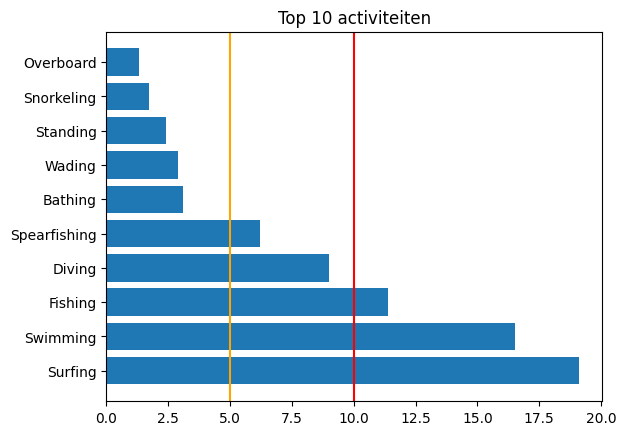


Conclusie:
Gekeken naar het aantal aanvallen per activiteit, blijkt dat enkele activiteiten een stuk vaker voorkomen.
Er zijn drie activiteiten die er met kop en schouders bovenuit steken, namelijk: surfen, zwemmen en vissen.
Deze zijn verantwoordelijk voor respectievelijk 19.1%, 16.5% en 11.4% van de aanvallen.
Iets minder frequent, maar nog steeds opvallend, zijn: duiken en speervissen (resp. 9% en 6.2%)




In [11]:
### Antwoord ###

# Resultaat inzichtelijk maken middels horizontale barchart
activities = shark_attacks['Activity2'].value_counts().head(10).index.tolist()
attacks = np.array(shark_attacks['Activity2'].value_counts().head(10).tolist())
total = shark_attacks.shape[0]
attackperc = (attacks / total * 100).round(1)

fig, (ax) = plt.subplots()
ax.barh(activities, attackperc)
plt.axvline(x=5, c='orange')
plt.axvline(x=10, c='r')
ax.set_title('Top 10 activiteiten')

# Antwoord
print('Vraag 4: Are certain activities more likely to result in a shark attack?\n')

plt.show()

print("""
Conclusie:
Gekeken naar het aantal aanvallen per activiteit, blijkt dat enkele activiteiten een stuk vaker voorkomen.
Er zijn drie activiteiten die er met kop en schouders bovenuit steken, namelijk: surfen, zwemmen en vissen.
Deze zijn verantwoordelijk voor respectievelijk 19.1%, 16.5% en 11.4% van de aanvallen.
Iets minder frequent, maar nog steeds opvallend, zijn: duiken en speervissen (resp. 9% en 6.2%)

"""
)